In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

sns.set(style = "darkgrid")

In [2]:
#Getting Data
mcp_df = pd.read_csv('insurance.csv')

In [3]:
mcp_df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Data exploration
mcp_df.info()
mcp_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Checking missing Data
mcp_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
mcp_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
#Separate sex
male = mcp_df[mcp_df['sex']=='male']
female = mcp_df[mcp_df['sex']=='female']
mcp_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
#Checking region
mcp_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
#Checking Children
mcp_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

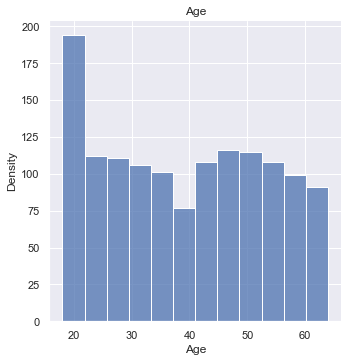

In [10]:
#Plotting
#1. Age
sns.displot(mcp_df['age'])
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

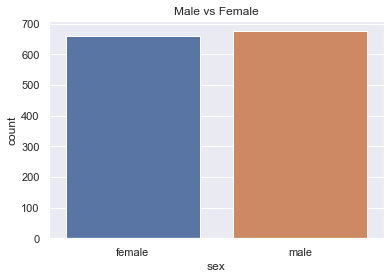

In [11]:
#2. Sex distribution
sns.countplot(data = mcp_df, x = 'sex')
plt.title('Male vs Female')
plt.show()

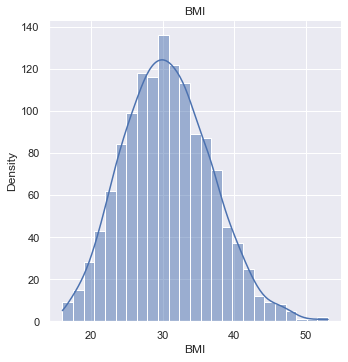

In [12]:
#3. BMI
sns.displot(mcp_df['bmi'], kde = True)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

C:\Users\duyng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


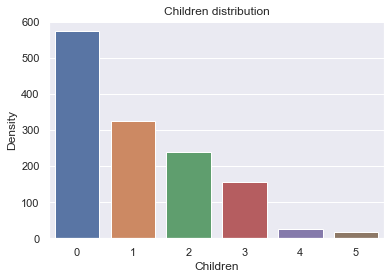

In [13]:
#4. Children distribution
sns.countplot(mcp_df['children'])
plt.title('Children distribution')
plt.xlabel('Children')
plt.ylabel('Density')
plt.show()

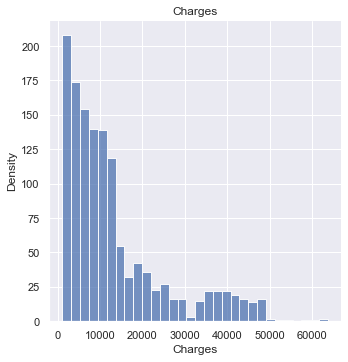

In [14]:
#5. Charges
sns.displot(mcp_df['charges'], bins = 30)
plt.title('Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.show()

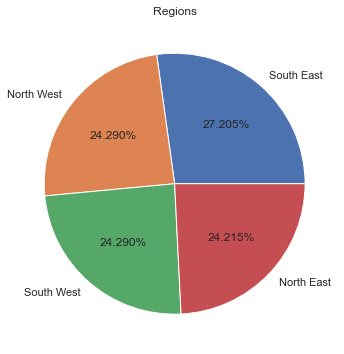

In [15]:
#6. Regions distribution
labels = ['South East','North West','South West','North East']
plt.figure(figsize=(10,6))
plt.pie(mcp_df['region'].value_counts(),labels=labels, autopct = '%1.3f%%')
plt.title('Regions')
plt.show()

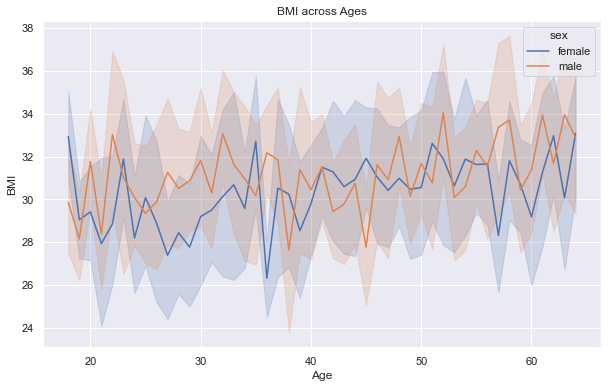

In [16]:
#7. BMI vs Age with 2 groups
plt.figure(figsize=(10,6))
sns.lineplot(data = mcp_df, x = 'age', y = 'bmi', hue = 'sex' )
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI across Ages')
plt.show()

<Figure size 720x432 with 0 Axes>

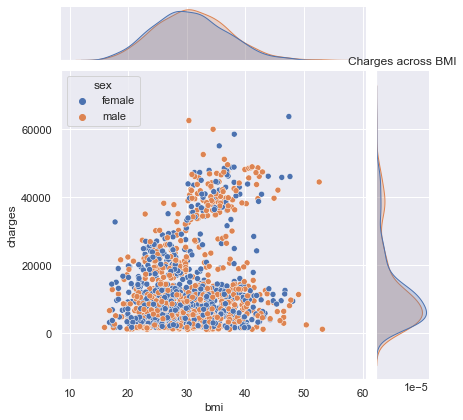

In [17]:
#8.1. BMI vs Charges with 2 groups of sex
plt.figure(figsize=(10,6))
sns.jointplot(data = mcp_df, x = 'bmi', y = 'charges', hue = 'sex')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges across BMI')
plt.show()

<Figure size 720x432 with 0 Axes>

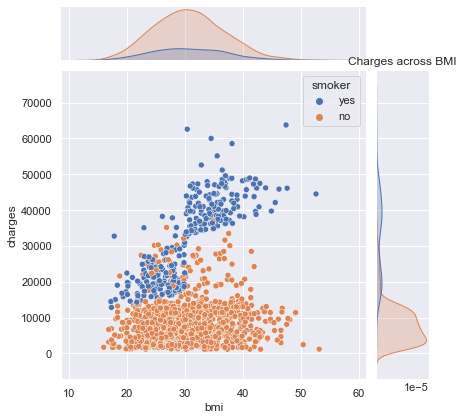

In [18]:
#8.2. BMI vs Charges with 2 groups of smoker
plt.figure(figsize=(10,6))
sns.jointplot(data = mcp_df, x = 'bmi', y = 'charges', hue = 'smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges across BMI')
plt.show()

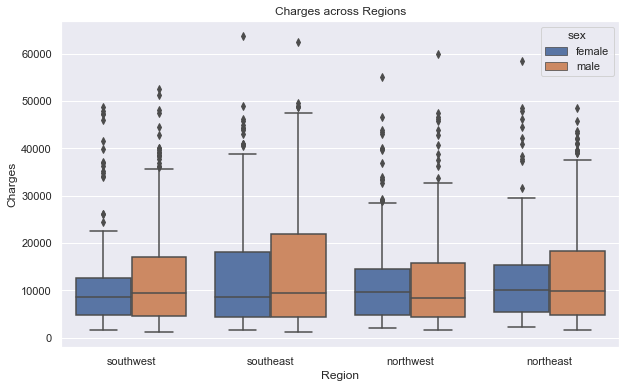

In [19]:
#9. Region vs Charges with 2 groups
plt.figure(figsize=(10,6))
sns.boxplot(data = mcp_df, x = 'region', y = 'charges', hue = 'sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges across Regions')
plt.show()

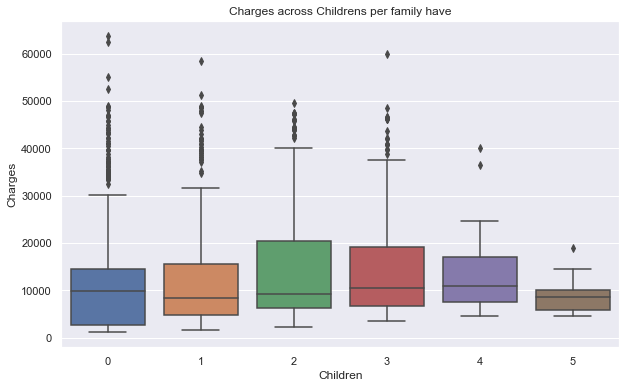

In [20]:
#10. Children vs Charges
plt.figure(figsize=(10,6))
sns.boxplot(data = mcp_df, x = 'children', y = 'charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Charges across Childrens per family have')
plt.show()

<Figure size 720x432 with 0 Axes>

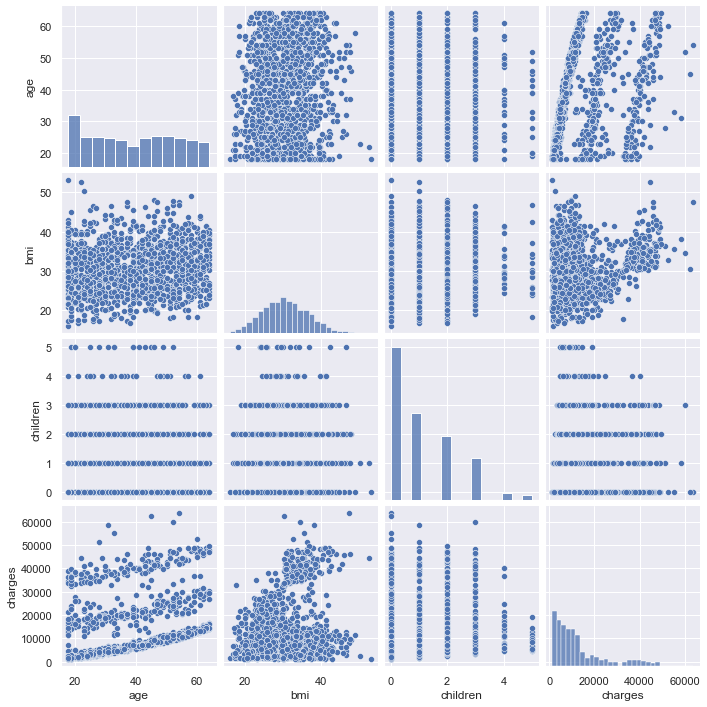

In [21]:
#11. Pair plot
fig = plt.figure(figsize = (10, 6))
sns.pairplot(mcp_df)
plt.show()

<AxesSubplot:>

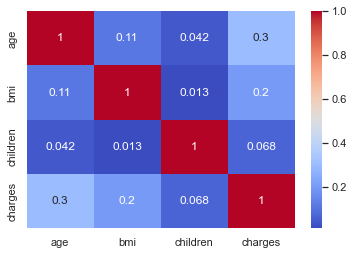

In [22]:
#12. Draw a correlation heatmap.
sns.heatmap(mcp_df.corr(), annot = True, cmap = 'coolwarm')

In [23]:
mcp_df.to_csv('temp_data.csv', index = False)